Loaded train.csv: 2906 rows
Loaded test.csv: 132 rows

Dataset overview
  Train samples: 2906
  Test samples:  132
  Labels: [1 2 3 4 5]

Training label distribution
  Label 1: 132 (4.54%)
  Label 2: 318 (10.94%)
  Label 3: 634 (21.82%)
  Label 4: 925 (31.83%)
  Label 5: 897 (30.87%)

Test label distribution
  Label 1: 9 (6.82%)
  Label 2: 28 (21.21%)
  Label 3: 34 (25.76%)
  Label 4: 27 (20.45%)
  Label 5: 34 (25.76%)

Baseline performance (TF-IDF + NB)
  Accuracy:     0.2273 (22.73%)
  F1-Macro:     0.1025
  F1-Weighted:  0.1133

Classification report
              precision    recall  f1-score   support

Érthetőség 1       0.00      0.00      0.00         9
Érthetőség 2       0.00      0.00      0.00        28
Érthetőség 3       1.00      0.03      0.06        34
Érthetőség 4       0.21      1.00      0.35        27
Érthetőség 5       0.40      0.06      0.10        34

    accuracy                           0.23       132
   macro avg       0.32      0.22      0.10       132
weight

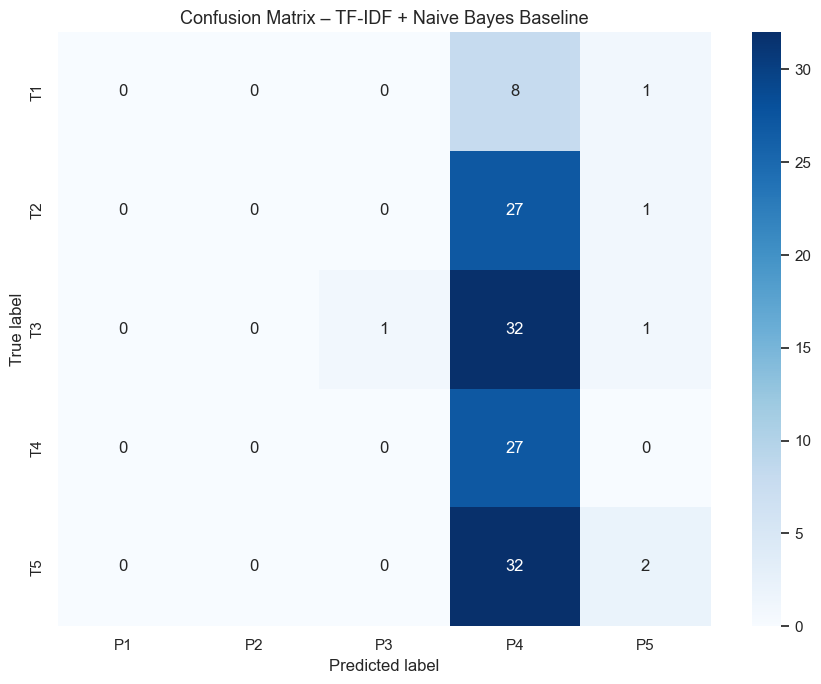


This baseline uses only surface-level lexical features.
It serves as a minimum benchmark.
Any model using syntax, semantics, or transformers
is expected to outperform this baseline.


In [16]:
# ============================================
# Baseline AI: Legal Readability Classification
# TF-IDF + Naive Bayes
# ============================================

from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

LABELS = [1, 2, 3, 4, 5]


# ============================================
# Data loading utilities
# ============================================

def load_dataset(csv_path: Path) -> pd.DataFrame:
    df = pd.read_csv(csv_path)
    print(f"Loaded {csv_path.name}: {df.shape[0]} rows")
    return df


def summarize_labels(y: np.ndarray, title: str):
    print(f"\n{title}")
    dist = pd.Series(y).value_counts().sort_index()
    for label, count in dist.items():
        pct = count / len(y) * 100
        print(f"  Label {label}: {count} ({pct:.2f}%)")


# ============================================
# Load train / test data
# ============================================

train_df = load_dataset(Path("../data/final/train.csv"))
test_df = load_dataset(Path("../data/final/test.csv"))

X_train = train_df["text"].values
y_train = train_df["label_numeric"].values

X_test = test_df["text"].values
y_test = test_df["label_numeric"].values

print("\nDataset overview")
print(f"  Train samples: {len(X_train)}")
print(f"  Test samples:  {len(X_test)}")
print(f"  Labels: {np.unique(y_train)}")

summarize_labels(y_train, "Training label distribution")
summarize_labels(y_test, "Test label distribution")


# ============================================
# Baseline model definition
# ============================================

baseline_model = Pipeline(
    steps=[
        (
            "tfidf",
            TfidfVectorizer(
                ngram_range=(1, 2),
                min_df=2,
                max_df=0.95,
                sublinear_tf=True,
            ),
        ),
        ("classifier", MultinomialNB()),
    ]
)

baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)


# ============================================
# Evaluation
# ============================================

accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average="macro")
f1_weighted = f1_score(y_test, y_pred, average="weighted")

print("\nBaseline performance (TF-IDF + NB)")
print(f"  Accuracy:     {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  F1-Macro:     {f1_macro:.4f}")
print(f"  F1-Weighted:  {f1_weighted:.4f}")

print("\nClassification report")
print(
    classification_report(
        y_test,
        y_pred,
        labels=LABELS,
        target_names=[f"Érthetőség {i}" for i in LABELS],
    )
)


# ============================================
# Confusion matrix visualization
# ============================================

cm = confusion_matrix(y_test, y_pred, labels=LABELS)

plt.figure(figsize=(9, 7))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[f"P{i}" for i in LABELS],
    yticklabels=[f"T{i}" for i in LABELS],
)

plt.title("Confusion Matrix – TF-IDF + Naive Bayes Baseline", fontsize=13)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


# ============================================
# Interpretation
# ============================================

print(
    "\nThis baseline uses only surface-level lexical features.\n"
    "It serves as a minimum benchmark.\n"
    "Any model using syntax, semantics, or transformers\n"
    "is expected to outperform this baseline."
)